In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [28]:
#1 load the iris datasets
iris=load_iris()
X=iris.data[:,:2]
y=iris.target

In [29]:
#2.setup Adaboost with decision stumpo
stump=DecisionTreeClassifier(max_depth=1,random_state=4)
adaboost = AdaBoostClassifier(
    base_estimator=stump,
    n_estimators=5,
    algorithm="SAMME.R",
    learning_rate=1.0,
    random_state=2
)

In [30]:
adaboost.fit(X,y)
estimators=adaboost.estimators_
estimators

[DecisionTreeClassifier(max_depth=1, random_state=1872583848),
 DecisionTreeClassifier(max_depth=1, random_state=794921487),
 DecisionTreeClassifier(max_depth=1, random_state=111352301),
 DecisionTreeClassifier(max_depth=1, random_state=1853453896),
 DecisionTreeClassifier(max_depth=1, random_state=213298710)]

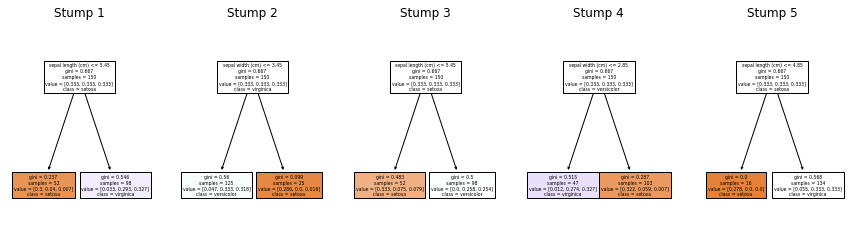

In [31]:
#plot each stump as a decision tree
from sklearn.tree import plot_tree
fig,axes=plt.subplots(1,5,figsize=(15,4))
for i,ax in enumerate(axes):
    clf=adaboost.estimators_[i]
    if isinstance(clf,DecisionTreeClassifier):
        plot_tree(clf,filled=True,
                  feature_names=iris.feature_names,
                  class_names=iris.target_names,ax=ax)
        ax.set_title(f"Stump {i+1}")
    else:
        ax.set_visible(False)

In [32]:
print("Stumps error and improvement:")
previous_error=None
for i,estimator in enumerate(estimators):
    pred=estimator.predict(X)
    error=np.mean(pred != y)s
    if previous_error is not None:
        improvement=(previous_error-error)/previous_error*100
        print(f"Stump {i+1}: Error ={error:.2f},Improvement:{improvement:.2f}%")
    else:
        print(f"Stump {i+1}: Error ={error:.2f} (First Stump)")
    previous_error=error

Stumps error and improvement:
Stump 1: Error =0.37 (First Stump)
Stump 2: Error =0.52,Improvement:-39.29%
Stump 3: Error =0.41,Improvement:21.79%
Stump 4: Error =0.55,Improvement:-34.43%
Stump 5: Error =0.56,Improvement:-2.44%


In [35]:
#final model accuracy 
final_pred=adaboost.predict(x)
final_error=np.mean(final_pred !=y)
first_error=np.mean(estimators[0].predict(X)!=y)
improvement_total=(first_error-final_error)/first_error*100
print(f"\n Final Adaboost Error: {final_error:.2f}")
print(f"\n Final Adaboost Error:{first_error:.2f}")
print(f"Total Improvement from first stump: {improvement_total:.2f}%")


 Final Adaboost Error: 0.38

 Final Adaboost Error:0.37
Total Improvement from first stump: -1.79%
